In [1]:
# LOAD DATA

[[0.384      0.3872     0.3872     ... 0.3872     0.3872     0.39039999]
 [0.368      0.368      0.368      ... 0.3136     0.3136     0.3136    ]
 [0.30719998 0.39039999 0.39039999 ... 0.39039999 0.39039999 0.3872    ]
 ...
 [0.59306663 0.59199995 0.59199995 ... 0.5952     0.59626663 0.59306663]
 [0.58773333 0.58666664 0.58879995 ... 0.58879995 0.58879995 0.58986664]
 [0.6037333  0.60479999 0.60906667 ... 0.60799998 0.6069333  0.60799998]]


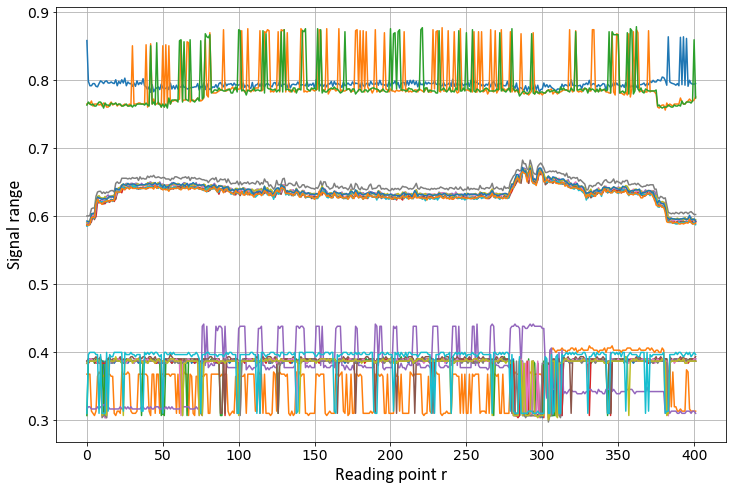

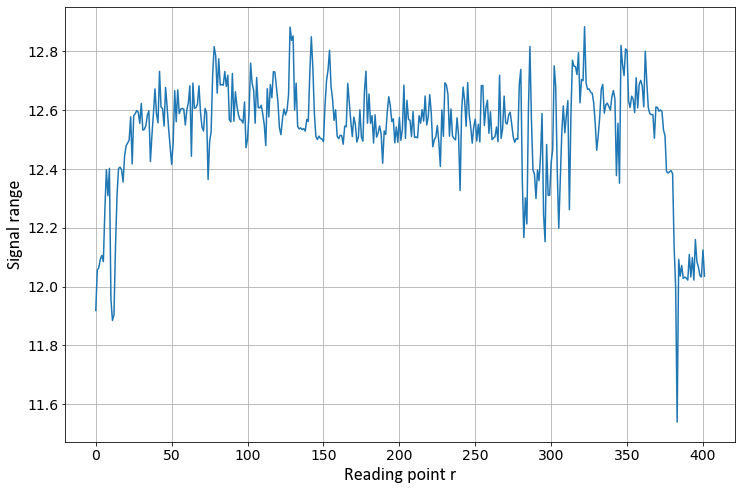

In [2]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import uniform_filter1d

data = np.loadtxt("filtered_processes.txt")
data2 = sum(data)

print(data)

# for i in range(0, len(data) - 1):
#     plt.plot(data[:][i])
#     plt.locator_params(axis = 'y', nbins = 10)
    
calibri = {'fontname':'Calibri'}
plt.figure(figsize = (12, 8))
plt.grid()
for i in range(0, len(data) - 1):
    plt.plot(data[:][i])
#plt.title("Sum of filtered signals", **calibri, fontsize=16)
plt.xlabel('Reading point r', **calibri, fontsize=18)
plt.ylabel('Signal range', **calibri, fontsize=18)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)

calibri = {'fontname':'Calibri'}
plt.figure(figsize = (12, 8))
plt.grid()
plt.plot(data2)
# for i in range(5, 36, 15):
#     y = uniform_filter1d(data2, size=i)
#     plt.plot(y, '--', label=f"{i}")
#plt.title("Filtered signals", **calibri, fontsize=18)
plt.xlabel('Reading point r', **calibri, fontsize=18)
plt.ylabel('Signal range', **calibri, fontsize=18)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
    
# plt.plot(data)

plt.show()

In [3]:
# NUMBER OF PRINCIPAL COMPONENTS

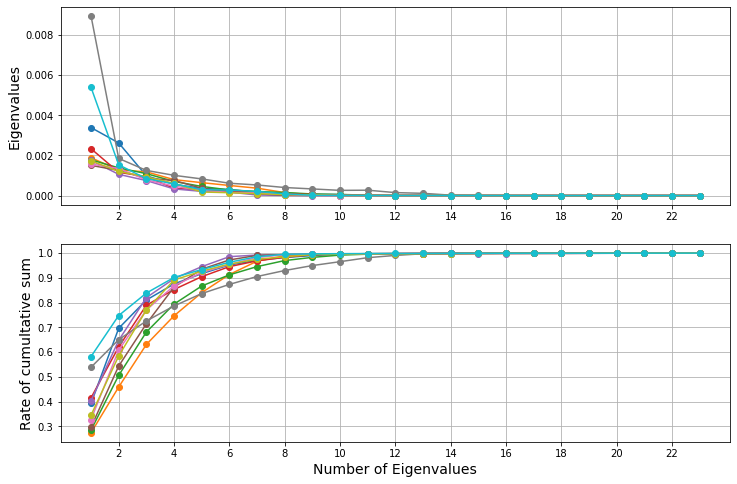

Number of Principal Components will be: 2


In [9]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("filtered_processes.txt")
ncov = 10
dumm = np.round(np.linspace(0, len(data[:][0]) - 1, ncov + 1)).astype(int)

fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 8))
#fig.suptitle('Screeplot', fontsize=18)
ax1.grid()
ax2.grid()


for i in range(0, ncov):
    # Compute covariance matrix
    cov = np.cov(data[:, dumm[i]:dumm[i + 1]])
#     print("Covariance matrix ", i + 1, ":")
#     print(cov[:1])
#     print("")

    # Compute eigenvectors from square covariance matrix
    (eigvals, eigvecs) = np.linalg.eig(cov)
#     print("Eigenvalues ", i + 1, ":")
#     print(eigvals[:1])
#     print("")

    # Return diagonals of eigenmatrix
    diag = -1 * np.diag(eigvals)
#     print("Diagonals ", i + 1, ":")
#     print(diag[:1])
#     print("")

    # Sort diagonals
    diag_sorted = -1 * np.sort(diag)
    diag_sorted = np.ravel(diag_sorted.sum(axis=1))
#     print("Sorted diagonals ", i + 1, ":")
#     print(diag_sorted[:5])
#     print("")

    # Plot data
    ax1.plot(diag_sorted, marker="o")
    ax2.plot(np.cumsum(diag_sorted)/np.sum(diag_sorted), marker="o")


plt.xlabel('Number of Eigenvalues', fontsize=14)
ax1.set_ylabel('Eigenvalues', fontsize=14)
ax2.set_ylabel('Rate of cumultative sum', fontsize=14)
plt.setp([ax1, ax2], xticks=np.arange(1, len(data), 2), xticklabels=np.arange(2, len(data) + 1, 2))
plt.show()

q = input("Number of Principal Components will be: ")

In [5]:
# BOTTOM-UP ALGORITHM

In [7]:
from pcaseg import *


flag = [0, 1]
# Initial number of segments for bottom-up algorithm
inicBU = 7 

for i in range(0, len(flag) - 1):
    (segment, tc) = pcaseg(data, inicBU, q, flag[i])
    print(segment)
    for k in range(0, segment.shape[1] - 1):
        for l in range(0, segment.shape[1] - 1):
            L = segment[k]

[(  0,   2, inf, inf) (  2,   4, inf, inf) (  4,   6, inf, inf)
 (  6,   8, inf, inf) (  8,  10, inf, inf) ( 10,  12, inf, inf)
 ( 12,  14, inf, inf) ( 14,  16, inf, inf) ( 16,  18, inf, inf)
 ( 18,  20, inf, inf) ( 20,  22, inf, inf) ( 22,  24, inf, inf)
 ( 24,  26, inf, inf) ( 26,  28, inf, inf) ( 28,  30, inf, inf)
 ( 30,  32, inf, inf) ( 32,  34, inf, inf) ( 34,  36, inf, inf)
 ( 36,  38, inf, inf) ( 38,  40, inf, inf) ( 40,  42, inf, inf)
 ( 42,  44, inf, inf) ( 44,  46, inf, inf) ( 46,  48, inf, inf)
 ( 48,  50, inf, inf) ( 50,  52, inf, inf) ( 52,  54, inf, inf)
 ( 54,  56, inf, inf) ( 56,  58, inf, inf) ( 58,  60, inf, inf)
 ( 60,  62, inf, inf) ( 62,  64, inf, inf) ( 64,  66, inf, inf)
 ( 66,  68, inf, inf) ( 68,  70, inf, inf) ( 70,  72, inf, inf)
 ( 72,  74, inf, inf) ( 74,  76, inf, inf) ( 76,  78, inf, inf)
 ( 78,  80, inf, inf) ( 80,  82, inf, inf) ( 82,  84, inf, inf)
 ( 84,  86, inf, inf) ( 86,  88, inf, inf) ( 88,  90, inf, inf)
 ( 90,  92, inf, inf) ( 92,  94, inf, in

IndexError: tuple index out of range